# Dimensionality Reduction

This notebook focuses on applying dimensionality reduction using TruncatedSVD.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [2]:
fn = ('/mnt/processed/private/msds2021/lt6/chicago-dataset/sample/'
      'taxi_tnp_weather.csv.gz')
df = pd.read_csv(fn, low_memory=False,
                 parse_dates=['trip_end_timestamp', 'trip_start_timestamp'])

<table>
<tr><th colspan=2 style="text-align: center"> Clustering Features</th></tr>
<tr>
    <td>dropoff_centroid_latitude</td>
    <td>dropoff_centroid_longitude</td>
</tr>
<tr>
    <td>pickup_centroid_latitude</td>
    <td>pickup_centroid_longitude</td>
</tr>
<tr>
    <td>fare</td>
    <td>tip</td>
</tr>
<tr>
    <td>trip_miles</td>
    <td>trip_seconds</td>
</tr>
<tr>
    <td>trip_total</td>
    <td>additional_charges</td>
</tr>
</table>

In [3]:
non_cluster_feature = ['trip_id', 'company',
                       'dropoff_community_area', 'pickup_community_area',
                       'trip_end_timestamp', 'trip_start_timestamp',
                       'Type', 'Severity', 'TransportType',
                       'payment_is_cashless']
dfc = pd.get_dummies(df.drop(columns=non_cluster_feature))
dfc.head()

,dropoff_centroid_latitude,dropoff_centroid_longitude,fare,pickup_centroid_latitude,pickup_centroid_longitude,tip,trip_miles,trip_seconds,trip_total,additional_charges,payment_type_cash,payment_type_credit_card,payment_type_mobile,payment_type_prepaid_card,payment_type_unknown
0,41.901207,-87.676356,12.25,41.899602,-87.633308,0.0,3.43,705.0,13.25,1.0,1,0,0,0,0
1,41.879067,-87.657005,9.00,41.892042,-87.631864,2.0,1.67,772.0,13.50,2.0,0,1,0,0,0
2,41.900070,-87.720918,9.50,41.922761,-87.699155,0.0,2.56,831.0,9.50,0.0,1,0,0,0,0
3,41.877406,-87.621972,15.75,41.921778,-87.651062,0.0,5.04,996.0,15.75,0.0,1,0,0,0,0
4,41.880994,-87.632746,16.75,41.922083,-87.634156,0.0,4.90,1219.0,17.75,1.0,1,0,0,0,0


In [4]:
stdscale = StandardScaler()
dfc = stdscale.fit_transform(dfc)

Number of PCs for above 90% Explained Variance: 9
Number of PCs for above 95% Explained Variance: 10


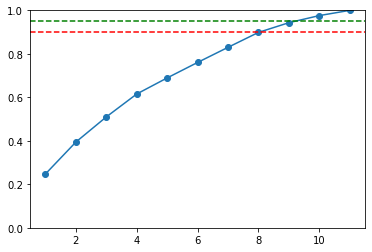

In [8]:
pca = PCA()
pca.fit(dfc)
exp_var = pca.explained_variance_ratio_
plt.plot(range(1, len(exp_var)+1), exp_var.cumsum(), 'o-')
plt.gca().axhline(0.9, c='r', ls='--')
plt.gca().axhline(0.95, c='g', ls='--')
plt.ylim([0, 1])
print('Number of PCs for above 90% Explained Variance:',
      np.size(exp_var) - np.sum(exp_var.cumsum() > 0.90) + 1)
print('Number of PCs for above 95% Explained Variance:',
      np.size(exp_var) - np.sum(exp_var.cumsum() > 0.95) + 1)

In [6]:
np.save('exp_var.npy', exp_var)

Setting the threshold of explained variance to 95%, we'll select **11 PCs** to retain prior to clustering. We'll save it to an `.npy` file for the clustering stage.

In [7]:
pca.set_params(n_components = 11)
dfc = pca.fit_transform(dfc)
np.save('pca.npy', dfc)